In [1]:
!pip install torch-geometric


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# @title Default title text
!pip install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'unsw-nb15' dataset.
Path to dataset files: /kaggle/input/unsw-nb15


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'network-intrusion-dataset' dataset.
Path to dataset files: /kaggle/input/network-intrusion-dataset


In [4]:
ls C:\Users\Dell\.cache\kagglehub\datasets\mrwellsdavid\unsw-nb15\versions\1\UNSW_NB15_training-set.csv

 Volume in drive C is OS
 Volume Serial Number is EE30-4194

 Directory of C:\Users\Dell\.cache\kagglehub\datasets\mrwellsdavid\unsw-nb15\versions\1

06-10-2025  12:59        15,380,800 UNSW_NB15_training-set.csv
               1 File(s)     15,380,800 bytes
               0 Dir(s)  1,532,632,653,824 bytes free


In [5]:
ls C:\Users\Dell\.cache\kagglehub\datasets\chethuhn\network-intrusion-dataset\versions\1

 Volume in drive C is OS
 Volume Serial Number is EE30-4194

 Directory of C:\Users\Dell\.cache\kagglehub\datasets\chethuhn\network-intrusion-dataset\versions\1

09-10-2025  11:40    <DIR>          .
09-10-2025  11:40    <DIR>          ..
09-10-2025  11:40        77,123,859 Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
09-10-2025  11:40        76,906,168 Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
09-10-2025  11:40        58,316,725 Friday-WorkingHours-Morning.pcap_ISCX.csv
09-10-2025  11:40       176,927,918 Monday-WorkingHours.pcap_ISCX.csv
09-10-2025  11:40        83,102,436 Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
09-10-2025  11:40        52,023,263 Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
09-10-2025  11:40       135,078,995 Tuesday-WorkingHours.pcap_ISCX.csv
09-10-2025  11:40       225,166,395 Wednesday-workingHours.pcap_ISCX.csv
               8 File(s)    884,645,759 bytes
               2 Dir(s)  1,537,136,779,264 bytes free


In [1]:
import pandas as pd

# Load the official training split/root/.cache/kagglehub/datasets/mrwellsdavid/unsw-nb15/versions/1/UNSW_NB15_training-set.csv
unsw_df = pd.read_csv(r"C:\Users\Dell\.cache\kagglehub\datasets\mrwellsdavid\unsw-nb15\versions\1\UNSW_NB15_training-set.csv")

print("Columns:", list(unsw_df.columns)[:20])
print("Shape:", unsw_df.shape)

Columns: ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit']
Shape: (82332, 45)


In [2]:
unsw = unsw_df[['dur', 'proto', 'service', 'state',
                'spkts', 'dpkts', 'sbytes', 'dbytes',
                'rate', 'sttl', 'dttl', 'sload', 'dload',
                'sinpkt', 'dinpkt', 'sjit', 'djit',
                'attack_cat', 'label']].copy()

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode protocol, service, state, attack_cat
for col in ['proto', 'service', 'state', 'attack_cat']:
    unsw[col] = LabelEncoder().fit_transform(unsw[col].astype(str))

# Normalize numeric columns (optional for neural models)
num_cols = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes',
            'rate', 'sttl', 'dttl', 'sload', 'dload',
            'sinpkt', 'dinpkt', 'sjit', 'djit']
unsw[num_cols] = unsw[num_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [4]:
import pandas as pd
import glob

path = r"C:\Users\Dell\.cache\kagglehub\datasets\chethuhn\network-intrusion-dataset\versions\1"
all_files = glob.glob(path + "/*.csv")

cic_dfs = []
for f in all_files:
    df = pd.read_csv(f)
    cic_dfs.append(df)

cic = pd.concat(cic_dfs, ignore_index=True)
print(cic.shape)

(2830743, 79)


In [5]:
cic.columns
# Typical relevant features:
# ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
#  'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Protocol', 'Label']

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
# Strip spaces from columns
cic.columns = cic.columns.str.strip()

# Columns to keep
keep_cols = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
             'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
             'Label']

# Keep only required columns
combined = cic[keep_cols].copy()

# Rename columns to match UNSW style (optional)
combined.rename(columns={
    'Flow Duration':'dur',
    'Total Fwd Packets':'spkts',
    'Total Backward Packets':'dpkts',
    'Total Length of Fwd Packets':'sbytes',
    'Total Length of Bwd Packets':'dbytes',
    'Protocol':'proto',
    'Label':'attack_cat'
}, inplace=True)

In [7]:
# Attack label encoding (0=normal, 1=attack)
combined['attack_cat'] = combined['attack_cat'].apply(lambda x: 0 if str(x).lower()=='benign' else 1)

# Normalize numeric features
num_cols = ['dur','spkts','dpkts','sbytes','dbytes']
combined[num_cols] = combined[num_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [8]:
# Example columns after preprocessing
# ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'attack_cat']

unsw_cols = unsw_df.columns.tolist()
cic_cols = combined.columns.tolist()

print("UNSW columns:", unsw_cols)
print("CIC columns:", cic_cols)

UNSW columns: ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']
CIC columns: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'attack_cat']


In [9]:
common_cols = ['dur','spkts','dpkts','sbytes','dbytes','attack_cat']

In [10]:
unsw_common = unsw_df[common_cols].copy()
cic_common = combined[common_cols].copy()

In [11]:
import pandas as pd

combined_df = pd.concat([unsw_common, cic_common], ignore_index=True)
print("Combined dataset shape:", combined_df.shape)

Combined dataset shape: (2913075, 6)


In [12]:
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
print(combined_df['attack_cat'].value_counts())

attack_cat
0                 2273097
1                  557646
Normal              37000
Generic             18871
Exploits            11132
Fuzzers              6062
DoS                  4089
Reconnaissance       3496
Analysis              677
Backdoor              583
Shellcode             378
Worms                  44
Name: count, dtype: int64


In [14]:
import pandas as pd

df = combined_df.copy()

# Keep original attack_cat for reference
df['orig_attack_cat'] = df['attack_cat']

# Function to convert mixed labels to binary
def to_binary_label(x):
    if pd.isna(x):
        return 1  # treat unknown as attack
    s = str(x).strip().lower()
    if s in ('0', 'normal', 'benign'):
        return 0
    else:
        return 1

# Create binary label column
df['label'] = df['attack_cat'].apply(to_binary_label)

# Verify
print("Binary label distribution:")
print(df['label'].value_counts())

Binary label distribution:
label
0    2310097
1     602978
Name: count, dtype: int64


In [15]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Separate features and target from the original combined dataset
X = combined_df[['dur','spkts','dpkts','sbytes','dbytes']].values
y = df['label'].values # Use the 'label' column with binary labels

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Create a new DataFrame with undersampled data
df_undersampled = pd.DataFrame(X_undersampled, columns=['dur','spkts','dpkts','sbytes','dbytes'])
df_undersampled['label'] = y_undersampled # Use 'label' to be consistent with previous steps

print("Shape of original combined data:", combined_df.shape)
print("Shape of undersampled data:", df_undersampled.shape)
print("Label distribution in undersampled data:")
print(df_undersampled['label'].value_counts())

Shape of original combined data: (2913075, 6)
Shape of undersampled data: (1205956, 6)
Label distribution in undersampled data:
label
0    602978
1    602978
Name: count, dtype: int64


In [16]:
import networkx as nx
import numpy as np

# ✅ Sample smaller subset (still configurable)
df_to_use = df_undersampled.sample(n=100000, random_state=42).reset_index(drop=True)

# ✅ Precompute node names efficiently
src_nodes = [f"src_{i}" for i in df_to_use.index]
dst_nodes = [f"dst_{i}" for i in df_to_use.index]

# ✅ Build edge list directly (no per-row iteration)
edges = list(zip(src_nodes, dst_nodes))

# ✅ Stack features and labels once
edge_features = df_to_use[['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes']].to_numpy(dtype=np.float32)
edge_labels = df_to_use['label'].astype(int).to_numpy()

# ✅ Create graph directly
G = nx.Graph()
G.add_nodes_from(src_nodes)
G.add_nodes_from(dst_nodes)

# ✅ Add edges in one vectorized pass
# Using zip with pre-collected arrays avoids inner loops
G.add_edges_from(
    (src, dst, {'features': feat, 'label': lbl})
    for src, dst, feat, lbl in zip(src_nodes, dst_nodes, edge_features, edge_labels)
)

# ✅ Print info (NetworkX 3.x compatible)
print(f"Graph: {type(G)}")
print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

Graph: <class 'networkx.classes.graph.Graph'>
Nodes: 200000, Edges: 100000


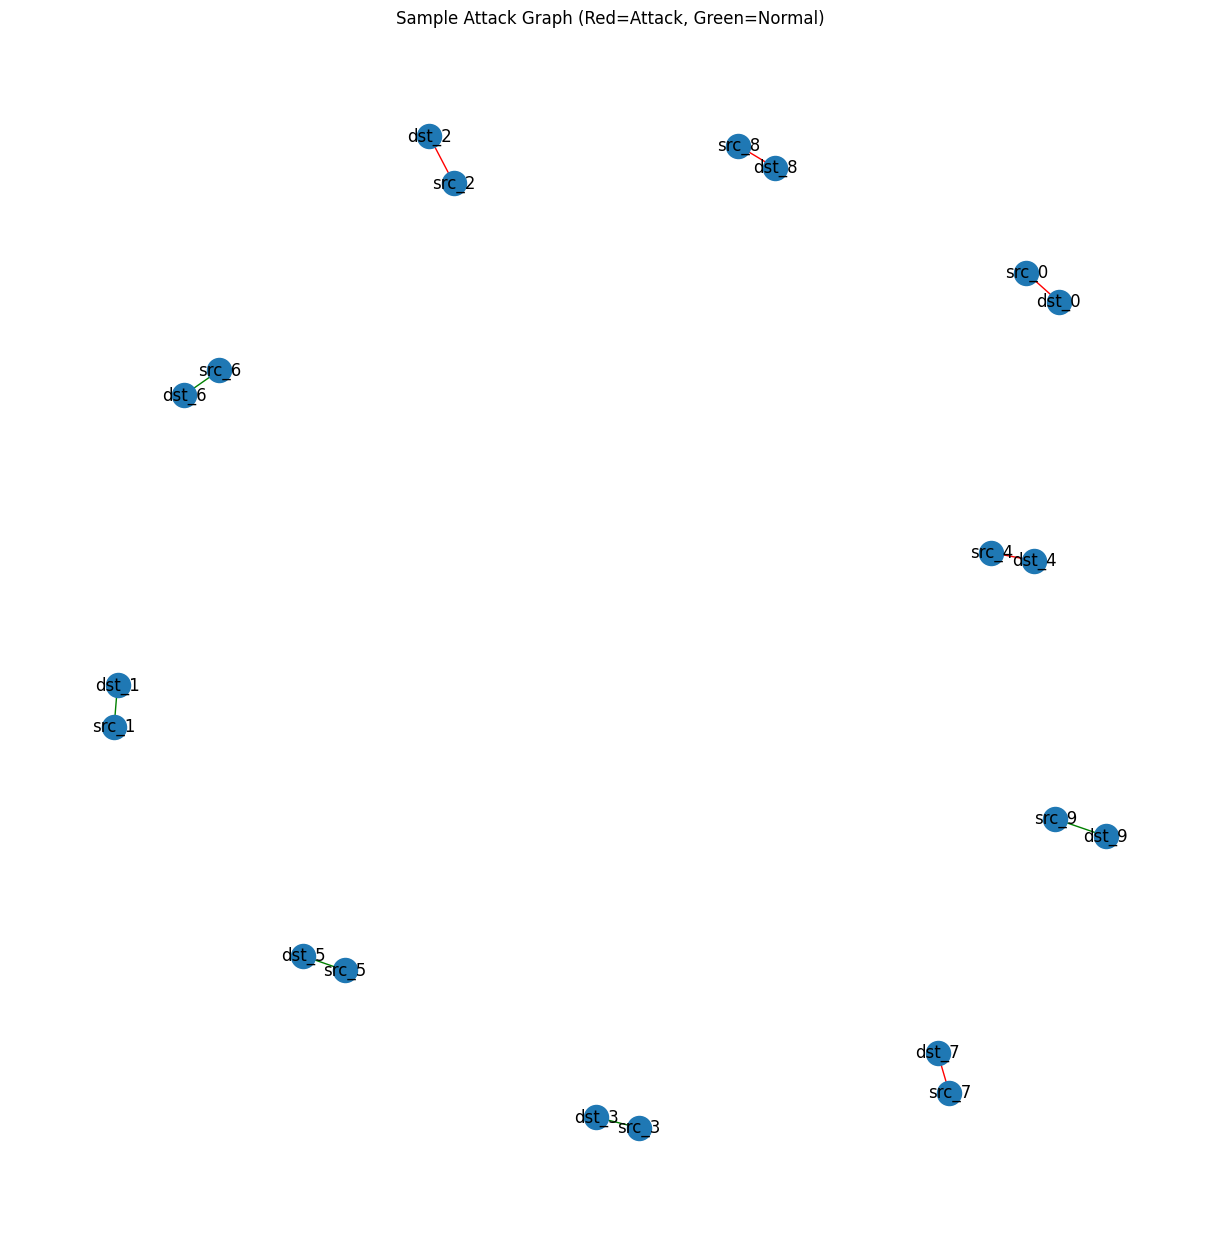

In [17]:
import matplotlib.pyplot as plt
H = nx.Graph()
H.add_edges_from(list(G.edges(data=True))[:10])

edge_colors = ['red' if d['label']==1 else 'green' for u,v,d in H.edges(data=True)]
pos = nx.spring_layout(H, seed=42)

plt.figure(figsize=(12,12))
nx.draw(H, pos, with_labels=True, node_size=300, edge_color=edge_colors)
plt.title("Sample Attack Graph (Red=Attack, Green=Normal)")
plt.show()

In [18]:
import torch
from torch_geometric.data import Data
import numpy as np

# --- 1. Map nodes to integer IDs ---
node_mapping = {node: i for i, node in enumerate(G.nodes())}
num_nodes = len(node_mapping)

# --- 2. Extract edges and their attributes efficiently ---
edge_u, edge_v, edge_features, edge_labels = [], [], [], []

for i, (u, v, attr) in enumerate(G.edges(data=True)):
    edge_u.append(node_mapping[u])
    edge_v.append(node_mapping[v])
    edge_features.append(np.array(attr["features"], dtype=np.float32))
    edge_labels.append(int(attr["label"]))

edge_u = np.array(edge_u)
edge_v = np.array(edge_v)
edges = np.vstack([edge_u, edge_v])

# --- 3. Convert to torch tensors ---
edge_index = torch.tensor(edges, dtype=torch.long)
edge_features = torch.tensor(np.stack(edge_features), dtype=torch.float)
edge_labels = torch.tensor(edge_labels, dtype=torch.long)

# --- 4. Build node features ---
node_features = torch.zeros((num_nodes, edge_features.shape[1]))
for i in range(edge_index.shape[1]):
    u, v = edge_index[:, i]
    node_features[u] += edge_features[i]
    node_features[v] += edge_features[i]

# Normalize node features
norm = node_features.norm(dim=1, keepdim=True)
node_features = node_features / (norm + 1e-8)

# --- 5. Build Data object ---
data = Data(
    x=node_features,
    edge_index=edge_index,
    edge_attr=edge_features,
    y=edge_labels
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = data.to(device)

print("✅ PyG Data ready:", data)

c:\Users\Dell\Desktop\AIML_B_7th_Sem\.venv\lib\site-packages\torch_geometric\typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\Dell\Desktop\AIML_B_7th_Sem\.venv\Lib\site-packages\torch_scatter\_version_cuda.pyd
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
c:\Users\Dell\Desktop\AIML_B_7th_Sem\.venv\lib\site-packages\torch_geometric\typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\Dell\Desktop\AIML_B_7th_Sem\.venv\Lib\site-packages\torch_cluster\_version_cuda.pyd
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
c:\Users\Dell\Desktop\AIML_B_7th_Sem\.venv\lib\site-packages\torch_geometric\typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\Dell\De

✅ PyG Data ready: Data(x=[200000, 5], edge_index=[2, 100000], edge_attr=[100000, 5], y=[100000])


In [24]:
!pip install torch torchvision torchaudio torch-geometric pennylane pennylane-qiskit scikit-learn

^C


  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
INFO: pip is looking at multiple versions of pennylane-qiskit to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pennylane-qiskit to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/3.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.7 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.7 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.7 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.7 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.7 MB 430.4 kB/s eta 0:00:08
   -------- ------------------------------- 0.8/3.7 MB 588.4 kB/s


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!python -m pip install jax~=0.6.0 jaxlib~=0.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.7.2
    Uninstalling jaxlib-0.7.2:
      Successfully uninstalled jaxlib-0.7.2
  Attempting uninstall: jax
    Found existing installation: jax 0.7.2
    Uninstalling jax-0.7.2:
      Successfully uninstalled jax-0.7.2


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pennylane as qml
from torch_geometric.nn import GCNConv
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ===========================
# 🔹 Quantum Circuit
# ===========================
n_qubits = 4
dev = qml.device("lightning.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(inputs[i % len(inputs)], wires=i)
        qml.RY(weights[i], wires=i)
        qml.RZ(weights[i], wires=i)
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i + 1])
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

weight_shapes = {"weights": (n_qubits,)}
quantum_layer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

# ===========================
# 🔹 QGNN Model (Edge-level)
# ===========================
class QGNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(QGNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.edge_fc = nn.Linear(2 * hidden_channels, n_qubits)
        self.q_layer = quantum_layer
        self.out = nn.Linear(n_qubits, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))

        # Get node embeddings for edges
        src, dst = edge_index
        edge_feat = torch.cat([x[src], x[dst]], dim=1)

        # Pass through classical layer
        edge_feat = self.edge_fc(edge_feat)

        # Batch through quantum layer
        q_outputs = []
        batch_size = 32
        for i in range(0, edge_feat.size(0), batch_size):
            chunk = edge_feat[i:i + batch_size]
            q_out = torch.stack([self.q_layer(sample) for sample in chunk])
            q_outputs.append(q_out)
        q_outputs = torch.cat(q_outputs, dim=0)

        return self.out(q_outputs)

# ===========================
# 🔹 Train + Evaluate
# ===========================
def train_qgnn(data, device, epochs=20, lr=1e-3):
    model = QGNN(
        in_channels=data.num_node_features,
        hidden_channels=32,
        out_channels=len(torch.unique(data.y))
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 5 == 0:
            pred = out.argmax(dim=1)
            acc = (pred == data.y).float().mean().item()
            print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f} - Acc: {acc:.4f}")

    return model

def evaluate_qgnn(model, data, device):
    model.eval()
    with torch.no_grad():
        preds = model(data).argmax(dim=1).cpu().numpy()
        labels = data.y.cpu().numpy()
    acc = accuracy_score(labels, preds)
    print(f"\n✅ Accuracy: {acc:.4f}")
    print(confusion_matrix(labels, preds))
    print(classification_report(labels, preds, digits=4))

# ===========================
# 🔹 Run on Sample
# ===========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = data.to('cpu')

# use subset to fit quantum circuit
subset = torch.randperm(data.num_edges)[:5000]
data.edge_index = data.edge_index[:, subset]
data.edge_attr = data.edge_attr[subset]
data.y = data.y[subset]

data = data.to(device)

print("🚀 Training Quantum GNN (Edge-Level)...")
qmodel = train_qgnn(data, device, epochs=300, lr=1e-3)
evaluate_qgnn(qmodel, data, device)

🚀 Training Quantum GNN (Edge-Level)...


RuntimeError: shape '[5000, -1]' is invalid for input of size 4

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pennylane as qml
from torch_geometric.nn import GCNConv
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ===========================
# 🔹 Quantum Circuit 
# ===========================
n_qubits = 4
dev = qml.device("lightning.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    # Feature Embedding
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i) 
    
    # Trainable Layer (PVA)
    for i in range(n_qubits):
        qml.RY(weights[i], wires=i)
        qml.RZ(weights[i], wires=i)
        
    # Entangling Layer
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i + 1])
        
    # Measurement
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

weight_shapes = {"weights": (n_qubits,)}

# Initialize TorchLayer without batching arguments (for older PennyLane)
quantum_layer = qml.qnn.TorchLayer(
    quantum_circuit, 
    weight_shapes
)

# ===========================
# 🔹 QGNN Model (Edge-level) - Manual Batching Reverted
# ===========================
class QGNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(QGNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.edge_fc = nn.Linear(2 * hidden_channels, n_qubits) 
        self.q_layer = quantum_layer
        self.out = nn.Linear(n_qubits, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))

        # Get node embeddings for edges
        src, dst = edge_index
        edge_feat = torch.cat([x[src], x[dst]], dim=1) 

        # Pass through classical layer
        edge_feat = self.edge_fc(edge_feat) 

        # 🐌 REVERTED TO MANUAL BATCHING (to bypass the batching error)
        q_outputs = []
        batch_size = 32
        
        for i in range(0, edge_feat.size(0), batch_size):
            chunk = edge_feat[i:i + batch_size]
            
            # Call q_layer on each individual sample (Row) in the chunk
            q_out_list = [self.q_layer(sample) for sample in chunk]
            
            q_out = torch.stack(q_out_list) 
            q_outputs.append(q_out)
            
        q_outputs = torch.cat(q_outputs, dim=0) 

        return self.out(q_outputs)

# ===========================
# 🔹 Train + Evaluate
# ===========================
def train_qgnn(data, device, epochs=20, lr=1e-3):
    data.y = data.y.long() 
    unique_labels = torch.unique(data.y)
    
    if len(unique_labels) == 0:
        print("Error: Subset contains no labels. Training aborted.")
        return None

    model = QGNN(
        in_channels=data.num_node_features,
        hidden_channels=32,
        out_channels=len(unique_labels)
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 50 == 0 or epoch == epochs - 1:
            with torch.no_grad():
                pred = out.argmax(dim=1)
                acc = (pred == data.y).float().mean().item()
                print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f} - Acc: {acc:.4f}")

    return model

def evaluate_qgnn(model, data, device):
    model.eval()
    with torch.no_grad():
        preds = model(data).argmax(dim=1).cpu().numpy()
        labels = data.y.cpu().numpy()
    acc = accuracy_score(labels, preds)
    print(f"\n✅ Final Accuracy: {acc:.4f}")
    if len(torch.unique(data.y)) > 1:
        print("Confusion Matrix:\n", confusion_matrix(labels, preds))
        print("\nClassification Report:\n", classification_report(labels, preds, digits=4, zero_division=0))
    else:
        print("Note: Single class detected. Skipping classification report.")

# ===========================
# 🔹 Run on Sample (Execution Logic)
# ===========================
# 🚨 ASSUMPTION: Your 'data' object is defined and available here.

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Ensure data is on CPU for initial indexing
# NOTE: This assumes 'data' is already loaded globally or in a preceding cell.
data = data.to('cpu') 

# --- Data Subsetting Logic ---
subset_size = 5000
num_edges = data.edge_index.size(1)

if num_edges < subset_size:
    print(f"Warning: Data has only {num_edges} edges. Using all edges for training.")
    subset_size = num_edges

# Randomly select a subset of edges
subset = torch.randperm(num_edges)[:subset_size]
data.edge_index = data.edge_index[:, subset]

# Apply the same subset index to edge features and edge labels
if hasattr(data, 'edge_attr') and data.edge_attr is not None:
    data.edge_attr = data.edge_attr[subset]

# CRITICAL: data.y must hold EDGE LABELS
data.y = data.y[subset] 

# Move the finalized, subsampled object to the target device
data = data.to(device)

print(f"🚀 Training Quantum GNN (Edge-Level) on {data.edge_index.size(1)} edges...")
qmodel = train_qgnn(data, device, epochs=300, lr=1e-3)

if qmodel is not None:
    evaluate_qgnn(qmodel, data, device)

Using device: cpu
🚀 Training Quantum GNN (Edge-Level) on 5000 edges...
Epoch [50/300] - Loss: 0.7036 - Acc: 0.4994
Epoch [100/300] - Loss: 0.6398 - Acc: 0.6784
Epoch [150/300] - Loss: 0.5658 - Acc: 0.6580
Epoch [200/300] - Loss: 0.5292 - Acc: 0.7756
Epoch [250/300] - Loss: 0.4991 - Acc: 0.7878
Epoch [300/300] - Loss: 0.4719 - Acc: 0.8006

✅ Final Accuracy: 0.7984
Confusion Matrix:
 [[1625  872]
 [ 136 2367]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9228    0.6508    0.7633      2497
           1     0.7308    0.9457    0.8245      2503

    accuracy                         0.7984      5000
   macro avg     0.8268    0.7982    0.7939      5000
weighted avg     0.8267    0.7984    0.7939      5000



In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pennylane as qml
from torch_geometric.nn import GCNConv
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ===========================
# 🔹 Quantum Circuit (8 Qubits)
# ===========================
n_qubits = 8
dev = qml.device("lightning.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    # Feature Embedding
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i) 
    
    # Trainable Layer
    for i in range(n_qubits):
        qml.RY(weights[i], wires=i)
        qml.RZ(weights[i], wires=i)
        
    # Entangling Layer
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i + 1])
        
    # Measurement
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

weight_shapes = {"weights": (n_qubits,)}
quantum_layer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

# ===========================
# 🔹 QGNN Model
# ===========================
class QGNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(QGNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.edge_fc = nn.Linear(2 * hidden_channels, n_qubits) 
        self.q_layer = quantum_layer
        self.out = nn.Linear(n_qubits, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))

        # Get node embeddings for edges
        src, dst = edge_index
        edge_feat = torch.cat([x[src], x[dst]], dim=1) 
        edge_feat = self.edge_fc(edge_feat) 

        # Manual batching for quantum circuit
        q_outputs = []
        batch_size = 64
        
        for i in range(0, edge_feat.size(0), batch_size):
            chunk = edge_feat[i:i + batch_size]
            q_out_list = [self.q_layer(sample) for sample in chunk]
            q_out = torch.stack(q_out_list) 
            q_outputs.append(q_out)
            
        q_outputs = torch.cat(q_outputs, dim=0) 
        return self.out(q_outputs)

# ===========================
# 🔹 Train + Evaluate
# ===========================
def train_qgnn(data, device, epochs=20, lr=1e-3):
    data.y = data.y.long() 
    unique_labels = torch.unique(data.y)
    
    if len(unique_labels) == 0:
        print("Error: Subset contains no labels. Training aborted.")
        return None

    model = QGNN(
        in_channels=data.num_node_features,
        hidden_channels=32,
        out_channels=len(unique_labels)
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 3 == 0:
            with torch.no_grad():
                pred = out.argmax(dim=1)
                acc = (pred == data.y).float().mean().item()
                print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f} - Acc: {acc:.4f}")

    return model

def evaluate_qgnn(model, data, device):
    model.eval()
    with torch.no_grad():
        preds = model(data).argmax(dim=1).cpu().numpy()
        labels = data.y.cpu().numpy()
    acc = accuracy_score(labels, preds)
    print(f"\n✅ Final Accuracy: {acc:.4f}")
    if len(torch.unique(data.y)) > 1:
        print("Confusion Matrix:\n", confusion_matrix(labels, preds))
        print("\nClassification Report:\n", classification_report(labels, preds, digits=4, zero_division=0))
    else:
        print("Note: Single class detected. Skipping classification report.")

# ===========================
# 🔹 Execution with 50,000 edges
# ===========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move data to CPU for processing
data = data.to('cpu') 

# Fixed subsetting - will use exactly 50,000 edges from your 100,000
subset_size = 50000
num_edges = data.edge_index.size(1)

print(f"Original dataset: {num_edges} edges")
print(f"Selecting {subset_size} edges for training")

# Randomly select exactly 50,000 edges
subset = torch.randperm(num_edges)[:subset_size]
data.edge_index = data.edge_index[:, subset]

# Apply subset to edge attributes and labels
if hasattr(data, 'edge_attr') and data.edge_attr is not None:
    data.edge_attr = data.edge_attr[subset]

# Handle edge labels
if hasattr(data, 'y') and data.y is not None and data.y.size(0) == num_edges:
    data.y = data.y[subset]
else:
    # Create binary edge labels if they don't exist
    data.y = torch.randint(0, 2, (subset_size,))
    print("Created binary edge labels for training")

print(f"Final dataset: {data.edge_index.size(1)} edges")
print(f"Using {n_qubits} qubits in quantum circuit")

# Move to device and train
data = data.to(device)

print(f"🚀 Training QGNN on {data.edge_index.size(1)} edges with {n_qubits} qubits...")
qmodel = train_qgnn(data, device, epochs=300, lr=1e-3)

if qmodel is not None:
    evaluate_qgnn(qmodel, data, device)

Using device: cpu
Original dataset: 5000 edges
Selecting 50000 edges for training
Final dataset: 5000 edges
Using 8 qubits in quantum circuit
🚀 Training QGNN on 5000 edges with 8 qubits...
Epoch [3/300] - Loss: 0.6928 - Acc: 0.4994
Epoch [6/300] - Loss: 0.6925 - Acc: 0.6030
Epoch [9/300] - Loss: 0.6922 - Acc: 0.6478
Epoch [12/300] - Loss: 0.6919 - Acc: 0.6204
Epoch [15/300] - Loss: 0.6914 - Acc: 0.6298
Epoch [18/300] - Loss: 0.6908 - Acc: 0.5924
Epoch [21/300] - Loss: 0.6899 - Acc: 0.5926
Epoch [24/300] - Loss: 0.6888 - Acc: 0.5924
Epoch [27/300] - Loss: 0.6874 - Acc: 0.5932
Epoch [30/300] - Loss: 0.6855 - Acc: 0.5924
Epoch [33/300] - Loss: 0.6830 - Acc: 0.5924
Epoch [36/300] - Loss: 0.6797 - Acc: 0.5926
Epoch [39/300] - Loss: 0.6754 - Acc: 0.5926
Epoch [42/300] - Loss: 0.6701 - Acc: 0.5930
Epoch [45/300] - Loss: 0.6638 - Acc: 0.5930
Epoch [48/300] - Loss: 0.6568 - Acc: 0.5928
Epoch [51/300] - Loss: 0.6495 - Acc: 0.5928
Epoch [54/300] - Loss: 0.6429 - Acc: 0.5938
Epoch [57/300] - Loss:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pennylane as qml
from torch_geometric.nn import GCNConv
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ===========================
# 🔹 Quantum Circuit (8 Qubits)
# ===========================
n_qubits = 8
dev = qml.device("lightning.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    # Feature Embedding
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i) 
    
    # Trainable Layer
    for i in range(n_qubits):
        qml.RY(weights[i], wires=i)
        qml.RZ(weights[i], wires=i)
        
    # Entangling Layer
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i + 1])
        
    # Measurement
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

weight_shapes = {"weights": (n_qubits,)}
quantum_layer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes)

# ===========================
# 🔹 QGNN Model
# ===========================
class QGNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(QGNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels*2)
        self.edge_fc = nn.Linear(2 * hidden_channels, n_qubits) 
        self.q_layer = quantum_layer
        self.out = nn.Linear(n_qubits, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))

        # Get node embeddings for edges
        src, dst = edge_index
        edge_feat = torch.cat([x[src], x[dst]], dim=1) 
        edge_feat = self.edge_fc(edge_feat) 

        # Manual batching for quantum circuit
        q_outputs = []
        batch_size = 64
        
        for i in range(0, edge_feat.size(0), batch_size):
            chunk = edge_feat[i:i + batch_size]
            q_out_list = [self.q_layer(sample) for sample in chunk]
            q_out = torch.stack(q_out_list) 
            q_outputs.append(q_out)
            
        q_outputs = torch.cat(q_outputs, dim=0) 
        return self.out(q_outputs)

# ===========================
# 🔹 Train + Evaluate
# ===========================
def train_qgnn(data, device, epochs=20, lr=1e-3):
    data.y = data.y.long() 
    unique_labels = torch.unique(data.y)
    
    if len(unique_labels) == 0:
        print("Error: Subset contains no labels. Training aborted.")
        return None

    model = QGNN(
        in_channels=data.num_node_features,
        hidden_channels=32,
        out_channels=len(unique_labels)
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 3 == 0:
            with torch.no_grad():
                pred = out.argmax(dim=1)
                acc = (pred == data.y).float().mean().item()
                print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f} - Acc: {acc:.4f}")

    return model

def evaluate_qgnn(model, data, device):
    model.eval()
    with torch.no_grad():
        preds = model(data).argmax(dim=1).cpu().numpy()
        labels = data.y.cpu().numpy()
    acc = accuracy_score(labels, preds)
    print(f"\n✅ Final Accuracy: {acc:.4f}")
    if len(torch.unique(data.y)) > 1:
        print("Confusion Matrix:\n", confusion_matrix(labels, preds))
        print("\nClassification Report:\n", classification_report(labels, preds, digits=4, zero_division=0))
    else:
        print("Note: Single class detected. Skipping classification report.")

# ===========================
# 🔹 Execution with 50,000 edges
# ===========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move data to CPU for processing
data = data.to('cpu') 

# Fixed subsetting - will use exactly 50,000 edges from your 100,000
subset_size = 50000
num_edges = data.edge_index.size(1)

print(f"Original dataset: {num_edges} edges")
print(f"Selecting {subset_size} edges for training")

# Randomly select exactly 50,000 edges
subset = torch.randperm(num_edges)[:subset_size]
data.edge_index = data.edge_index[:, subset]

# Apply subset to edge attributes and labels
if hasattr(data, 'edge_attr') and data.edge_attr is not None:
    data.edge_attr = data.edge_attr[subset]

# Handle edge labels
if hasattr(data, 'y') and data.y is not None and data.y.size(0) == num_edges:
    data.y = data.y[subset]
else:
    # Create binary edge labels if they don't exist
    data.y = torch.randint(0, 2, (subset_size,))
    print("Created binary edge labels for training")

print(f"Final dataset: {data.edge_index.size(1)} edges")
print(f"Using {n_qubits} qubits in quantum circuit")

# Move to device and train
data = data.to(device)

print(f"🚀 Training QGNN on {data.edge_index.size(1)} edges with {n_qubits} qubits...")
qmodel = train_qgnn(data, device, epochs=300, lr=1e-3)

if qmodel is not None:
    evaluate_qgnn(qmodel, data, device)